<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/Geopandas/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01-Indrotução ao GeoPandas

## Biblioteca e os dados

In [10]:
#!pip install geopandas==0.13.2

In [11]:
import geopandas as gpd

In [12]:
url = 'https://github.com/Gabriellemga/Python_Data_Science_Alura/raw/main/Geopandas/dados/RJ_Municipios_2022.shp'

In [13]:
rj = gpd.read_file(url)
rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


In [14]:
type(rj)

geopandas.geodataframe.GeoDataFrame

<Axes: >

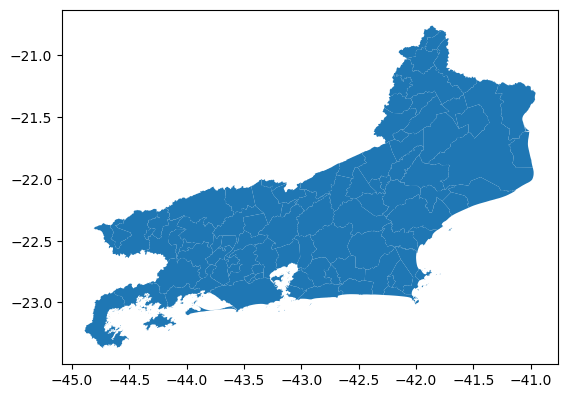

In [15]:
rj.plot()

<Axes: >

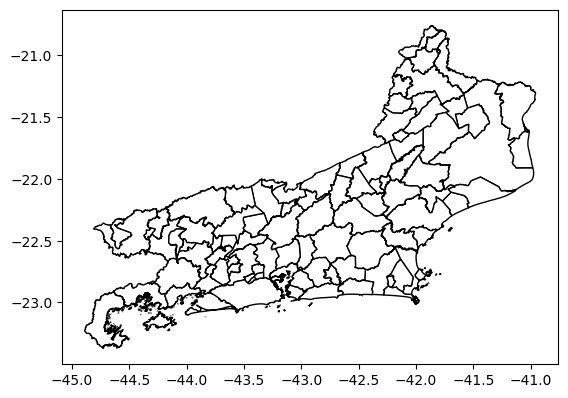

In [16]:
rj.plot(color='white', edgecolor='black')

## Trabalhando com shapefiles

In [17]:
rj = rj[rj['NM_MUN']=='Rio de Janeiro']

<Axes: >

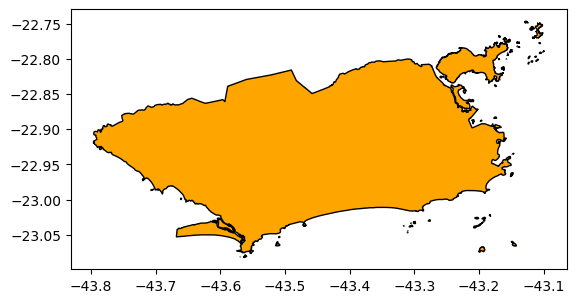

In [18]:
rj.plot(color='orange', edgecolor='black')

In [19]:
rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
67,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


In [20]:
rj.to_file('RJ-MUNIC.shp')

In [21]:
rj_munic = gpd.read_file('RJ-MUNIC.shp')

<Axes: >

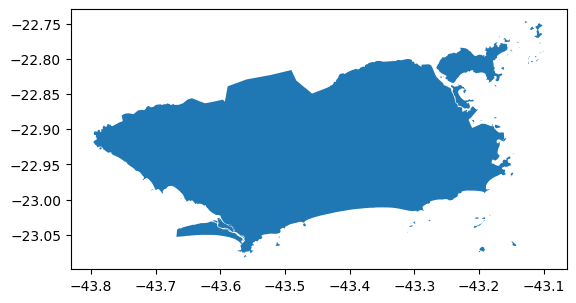

In [22]:
rj_munic.plot()

# 02 - Trabalhando como sistemas de coordenadas

# Preparando o DataFrame

In [23]:
import pandas as pd

In [24]:
url = 'https://raw.githubusercontent.com/Gabriellemga/Python_Data_Science_Alura/refs/heads/main/Geopandas/dados/dados.csv'

In [25]:
df = pd.read_csv(url,sep='\t')
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
list(zip(df['Longitude'],df['Latitude']))

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004),
 (-43.4775047, -23.0189271),
 (-43.2471087, -22.9335749),
 (-43.192534, -22.9823004),
 (-51.92528, -14.235004),
 (-43.175411, -22.9364023),
 (-43.262945, -22.918533),
 (-49.0606445, -26.9225709),
 (-43.303056, -23.013213),
 (-43.1698189, -22.952982),
 (-43.1849587, -22.9706444),
 (-43.3548121, -23.0097423),
 (-49.0606445, -26.9225709),
 (-43.3461644, -22.938107),
 (-43.1819538, -22.9497255),
 (-43.2327966, -22.9218818),
 (-43.3939698, -22.9995191),
 (-43.2808515, -22.9055097),
 (-43.1875152, -22.934498),
 (-43.5016663, -23.0191083),
 (-43.4590496, -23.023215),
 (-43.2339034, -22.9936095),
 (-43.1987716, -22.985368),
 (-43.2308106, -22.9771863),
 (-43.2525968, -22.9267666),
 (-51.92528, -14.235004),
 (-43.1852932, -22.9705243),
 (-43.4178323, -22.9990708),
 (-43.3079711, -23.0141101),
 (-43.350626, -22.988612),
 (-43.4152111, -22.9980081),
 (-43.199

In [28]:
from shapely import Point

In [29]:
pontos_geometricos = [Point(x) for x in zip(df['Longitude'],df['Latitude'])]

In [30]:
pontos_geometricos

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.478 -23.019)>,
 <POINT (-43.247 -22.934)>,
 <POINT (-43.193 -22.982)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.175 -22.936)>,
 <POINT (-43.263 -22.919)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.303 -23.013)>,
 <POINT (-43.17 -22.953)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.355 -23.01)>,
 <POINT (-49.061 -26.923)>,
 <POINT (-43.346 -22.938)>,
 <POINT (-43.182 -22.95)>,
 <POINT (-43.233 -22.922)>,
 <POINT (-43.394 -23)>,
 <POINT (-43.281 -22.906)>,
 <POINT (-43.188 -22.934)>,
 <POINT (-43.502 -23.019)>,
 <POINT (-43.459 -23.023)>,
 <POINT (-43.234 -22.994)>,
 <POINT (-43.199 -22.985)>,
 <POINT (-43.231 -22.977)>,
 <POINT (-43.253 -22.927)>,
 <POINT (-51.925 -14.235)>,
 <POINT (-43.185 -22.971)>,
 <POINT (-43.418 -22.999)>,
 <POINT (-43.308 -23.014)>,
 <POINT (-43.351 -22.989)>,
 <POINT (-43.415 -22.998)>,
 <POINT (-43.199 -22.981)>,

In [31]:
crs = {'proj': 'latlong', 'ellps':'WGS84', 'datum': 'WGS84','no_defs':True}
geo_dados = gpd.GeoDataFrame(df, crs=crs, geometry=pontos_geometricos)

In [32]:
geo_dados.to_file('DATASET.shp')

<Axes: >

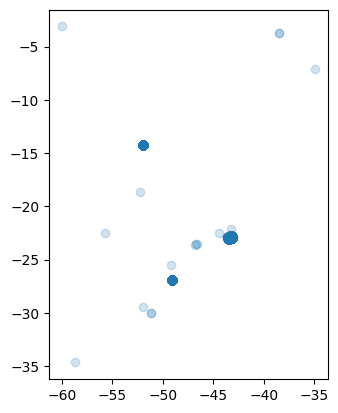

In [33]:
geo_dados.plot(alpha=0.2)

## Defininto coordenadas

In [34]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Modificando o Sistema de Coordenadas

In [36]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [37]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

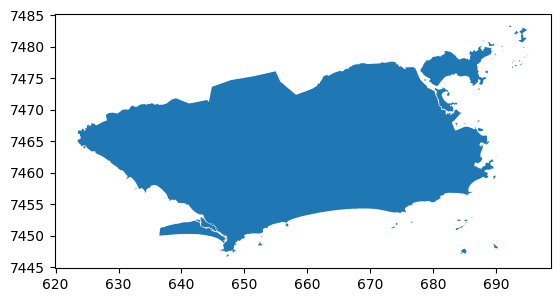

In [38]:
rj.plot()

# 03- Filtrando imoveis por região

## Identificando Outliers

<Axes: >

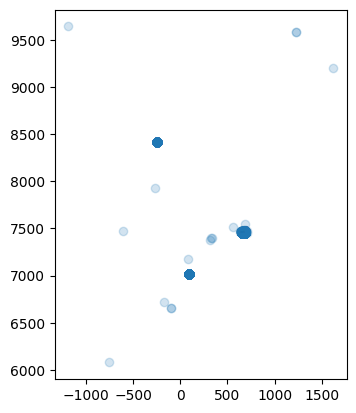

In [39]:
base = rj.plot(color='black')
geo_dados.plot(ax=base, alpha=0.2)

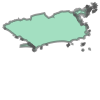

In [40]:
rj.iloc[0].geometry

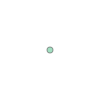

In [41]:
geo_dados.iloc[0].geometry

In [42]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

## Selecionando dados de uma região

In [43]:
geo_dados.shape

(5000, 14)

In [44]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]

In [45]:
geo_dados.shape

(4513, 14)

<Axes: >

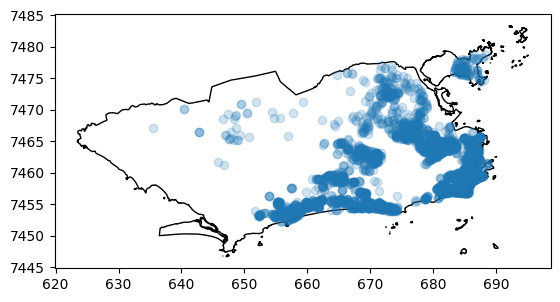

In [46]:
base = rj.plot(color='white',edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)

## Acrescentando estações do metrô

In [47]:
url_m = 'https://github.com/alura-cursos/curso_geopandas/raw/main/dados/metro.geojson'

In [48]:
metro = gpd.read_file(url_m)
metro.head()

,objectid,cod,nome,flg_atm,flg_bicicletario,flg_elevador,flg_linha1,flg_linha2,obs,flg_ativa,...,integra_trem,integra_onibus,integra_brt,corredor,integra_vlt,onibus,flg_metro_superficie,metro_superficie,data_inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36489 -22.80663)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35849 -22.81628)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34968 -22.82453)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.3433 -22.83149)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.3339 -22.8427)


In [49]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

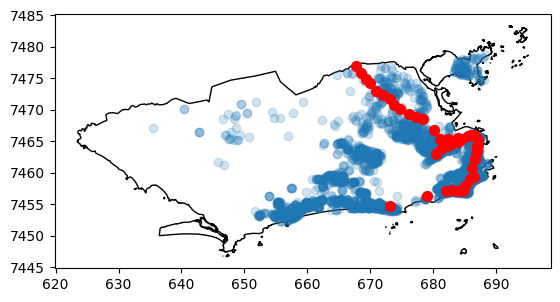

In [50]:
base = rj.plot(color='white',edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)
metro.plot(ax=base,color='red',markersize=50)

# 04- Calculando distâncias

## Estação do metrô mais próxima

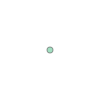

In [51]:
geo_dados.iloc[0].geometry

In [52]:
metro.distance(geo_dados.iloc[0].geometry)

,0
0,25.318520
1,24.620213
2,24.220939
3,23.877738
4,23.353973
5,23.519656
6,23.654293
7,23.397071
8,23.640009
9,24.205180


In [53]:
distancias = metro.distance(geo_dados.iloc[0].geometry)

In [54]:
distancias.min()

15.618532512237714

In [55]:
geo_dados['Dist_metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [56]:
import numpy as np
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

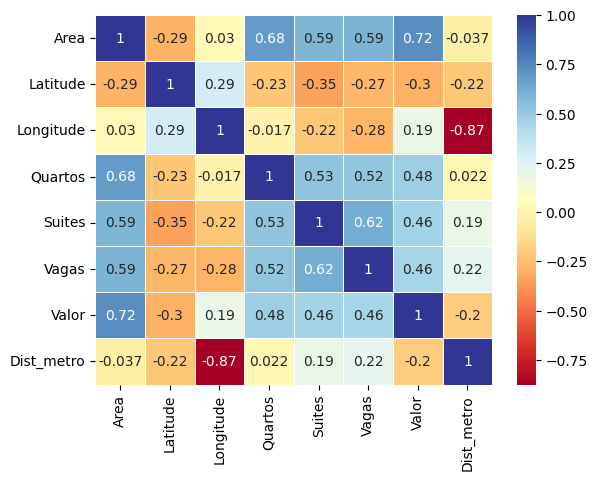

In [57]:
import seaborn as sns
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

## Agregando dados de transportes

In [58]:
url_brt = 'https://github.com/Gabriellemga/Python_Data_Science_Alura/raw/main/Geopandas/dados/brt.geojson'
url_trem = 'https://github.com/Gabriellemga/Python_Data_Science_Alura/raw/main/Geopandas/dados/trem.geojson'

In [59]:
trem = gpd.read_file(url_trem)
brt = gpd.read_file(url_brt)

In [60]:
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [61]:
trem = trem[trem.within(rj.iloc[0].geometry)]

In [62]:
brt = brt[brt.within(rj.iloc[0].geometry)]

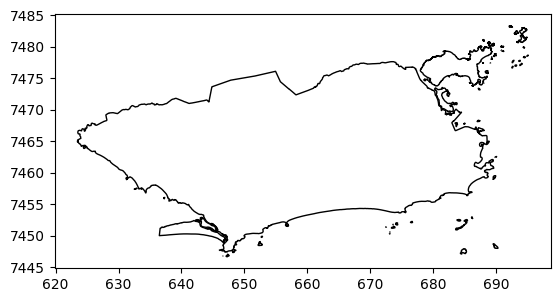

In [63]:
base = rj.plot(color='white',edgecolor='black')

<Axes: >

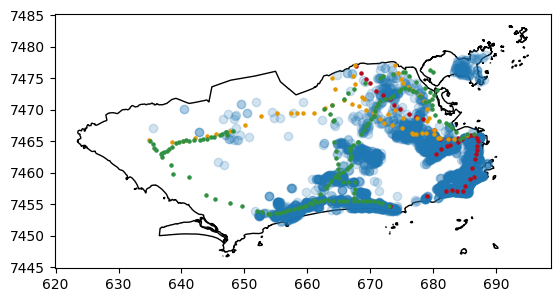

In [64]:
base = rj.plot(color='white',edgecolor='black')
geo_dados.plot(ax=base, alpha=0.2)
metro.plot(ax=base, color='#b60a1c',markersize=5)
trem.plot(ax=base, color='#e39802',markersize=5)
brt.plot(ax=base, color='#309143',markersize=5)

In [65]:
transporte = pd.concat([trem.geometry,metro.geometry,brt.geometry],ignore_index = True)

In [66]:
geo_dados['Dist_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [67]:
import numpy as np
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

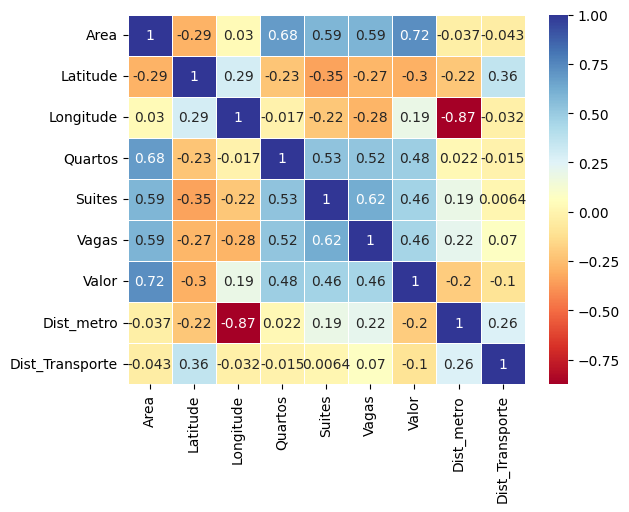

In [68]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidth=0.5)

## Calculando a distância até a praia

dados : https://www.data.rio/datasets/cobertura-vegetal-e-uso-da-terra-2018/explore

In [69]:
url_p = '/content/Cobertura_Vegetal_e_Uso_da_Terra_2018.geojson'

In [70]:
praias = gpd.read_file(url_p)
praias.head()

,objectid,grupo,classe,formacoes,estagio_sucessional,sigla,ano,legenda,smac_,st_areashape,st_perimetershape,geometry
0,49465,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,8684.151722,8684.152076,431.969730,"POLYGON ((-43.56631 -23.06286, -43.56616 -23.0..."
1,49466,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,2209.349128,2209.347164,241.436675,"POLYGON ((-43.59629 -23.04797, -43.5964 -23.04..."
2,49467,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17015.388810,17015.386794,468.729476,"POLYGON ((-43.59742 -23.04846, -43.59725 -23.0..."
3,49468,Outros,Corpos d’água continentais,,,Con,2018-06-01 00:00:00+00:00,Corpos d’água continentais,17597.587072,17597.571083,916.464380,"POLYGON ((-43.60753 -23.04328, -43.60773 -23.0..."
4,49469,Antropismo,Vegetação gramíneo-lenhosa,,,Vg,2018-06-01 00:00:00+00:00,Vegetação gramíneo-lenhosa,11834.907080,11834.901131,605.329904,"POLYGON ((-43.5712 -23.0593, -43.57117 -23.059..."


In [71]:
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<Axes: >

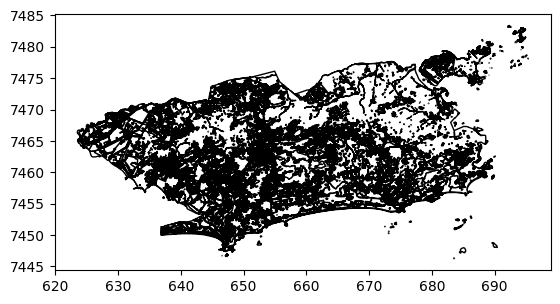

In [72]:
praias.plot(color = 'white', edgecolor = 'black')

In [73]:
praias['classe'].unique()

array(['Corpos d’água continentais', 'Vegetação gramíneo-lenhosa',
       'Formação Pioneira com influência marinha',
       'Vegetação arbórea não florestal', 'Áreas Urbanas', 'Praia',
       'Formação Pioneira com influência flúvio-marinh',
       'Formação Pioneira com influência flúvio-lacust', 'Uso agrícola',
       'Floresta Ombrófila Densa', 'Afloramento Rochoso', 'Solo exposto',
       'Reflorestamento', 'Atividades de Extração Mineral',
       'Corpos d’água costeiros'], dtype=object)

In [74]:
praias = praias[praias['classe'] == 'Praia']

<Axes: >

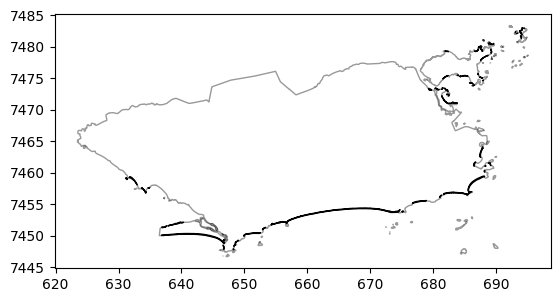

In [75]:
base = rj.plot(color='white',edgecolor='black',alpha=0.4)
praias.plot(ax=base,color='white',edgecolor='black')

In [76]:
geo_dados['Dist_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [77]:
import numpy as np
geo_dados_num = geo_dados.select_dtypes(include=[np.number])
correlacao = geo_dados_num.corr()

<Axes: >

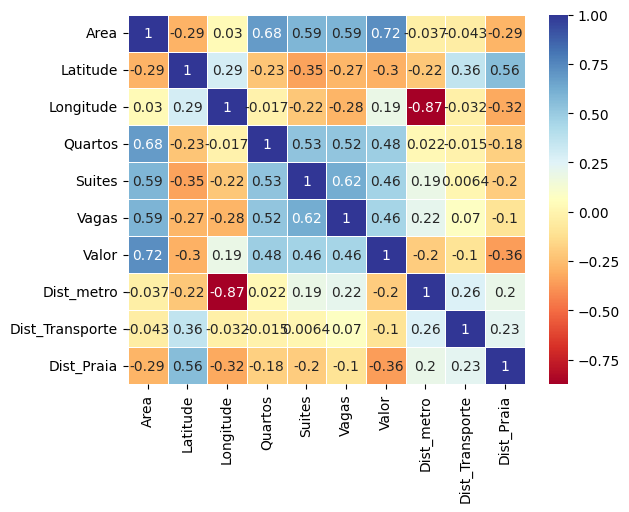

In [78]:
sns.heatmap(correlacao, annot=True, cmap='RdYlBu', linewidths=0.5)

<Axes: xlabel='Dist_Praia', ylabel='Valor'>

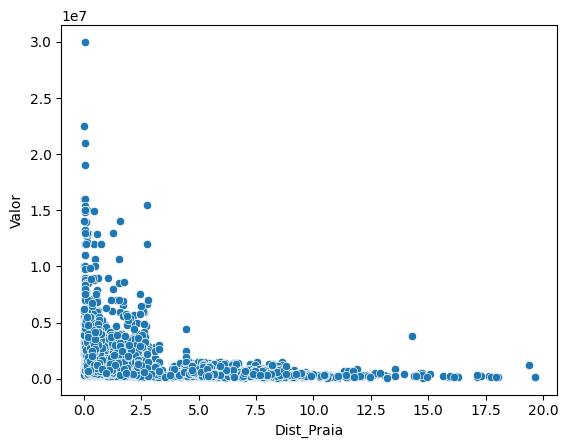

In [79]:
sns.scatterplot(x='Dist_Praia',y='Valor',data=geo_dados)

# Polygon, Point, LineString e MultiPolygon

Durante as aulas, vimos que uma das colunas, a geometry, continha elementos como o MULTYPOLYGON e POLYGON para definir as formas apresentadas no mapa. O POLYGON é um polígono e o MULTIPOLYGON é a combinação de dois ou mais polígonos. Mas também podemos definir outras formas como pontos e linhas.

Para definir formas desse tipo podemos usar a [biblioteca shapely](https://pypi.org/project/shapely/). Por exemplo, se quisermos definir formas como um ponto, uma linha, e polígonos, podemos fazer da seguinte forma:

In [80]:
from shapely.geometry import MultiPolygon, Polygon, Point, LineString

#Ponto
p1 = Point(0.5,0.5)

#Linha
p2 = LineString([(0,1),(3,0),(1,1)])

##Polígonos
p3 = Polygon([(1,0),(1.5,0.4),(2,0)])

p4 = Polygon([(1,1),(1.5,0.6),(2,1)])

<Axes: >

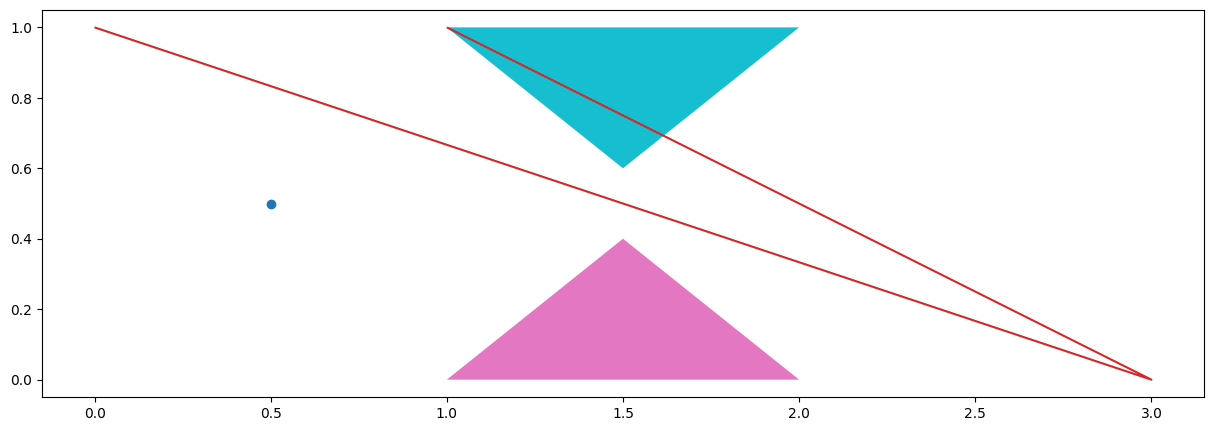

In [81]:
import geopandas as gpd
g = gpd.GeoSeries([p1,p2,p3,p4])
g.plot(cmap='tab10',figsize=(15,10))

<Axes: >

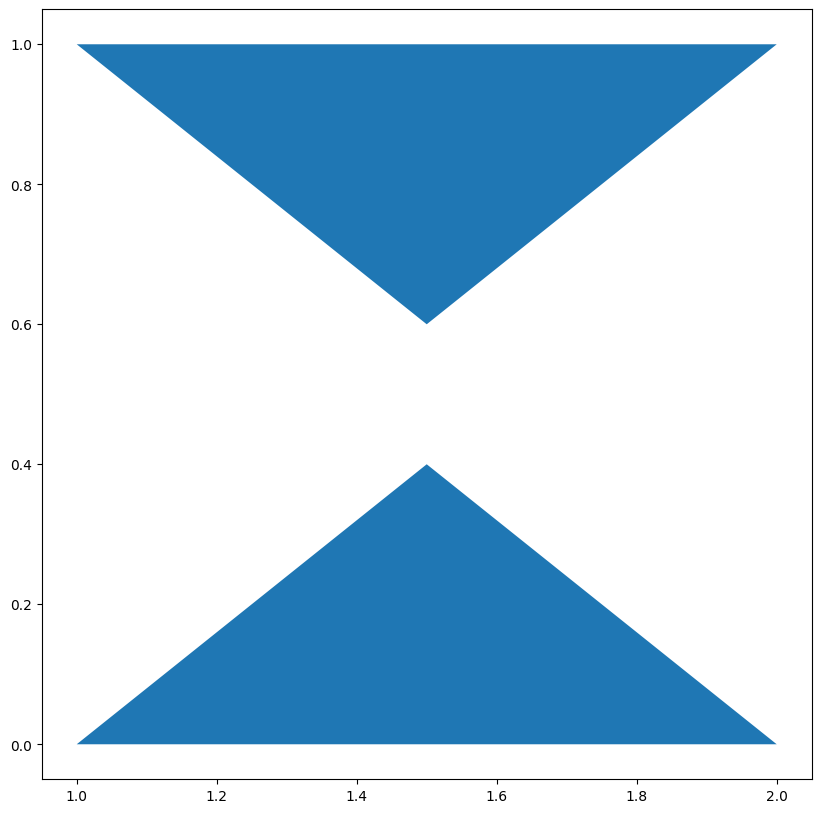

In [82]:
p8 = MultiPolygon([p3,p4])
g = gpd.GeoSeries([p8])
g.plot(cmap='tab10',figsize=(15,10))